In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
import utilities as rocku
import dxchange
from tqdm import tqdm
import timeit
import multiprocessing as mp
# from joblib import Parallel, delayed

In [2]:
# %matplotlib notebook
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
ncore = mp.cpu_count()
ncore

48

# Workflow starts here!

In [4]:
###################### need to change start
ipts="28402"
###################### need to change end

## Find file location

In [6]:
# ct_loc = "/HFIR/CG1D/IPTS-"+ipts+"/raw/ct_scans"
# file_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/raw_to_recon"
data_loc = "/HFIR/CG1D/IPTS-"+ipts+"/shared/processed_data/normalized"

os.listdir(data_loc)

['2023_09_07_insitu_60s_binned_by_5',
 '2023_09_06_insitu_60s_binned_by_5',
 '2023_09_07_insitu_60s',
 '2023_09_06_exsitu',
 '2023_09_06_insitu_60s',
 '2023_09_06_insitu_60s_binned_by_10']

In [20]:
folder_name = "2023_09_07_insitu_60s_binned_by_5"
data_dir = os.path.join(data_loc, folder_name)
fname_list = sorted(os.listdir(data_dir))

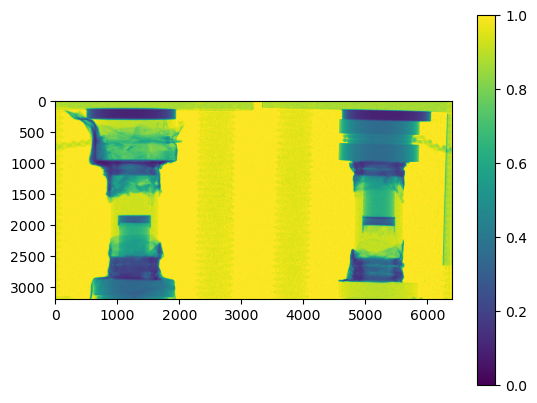

In [21]:
img_idx = 0
img = dxchange.read_tiff(os.path.join(data_dir, fname_list[img_idx]))
plt.imshow(img, vmin=0, vmax=1)
plt.colorbar()
plt.show()

Cropped:


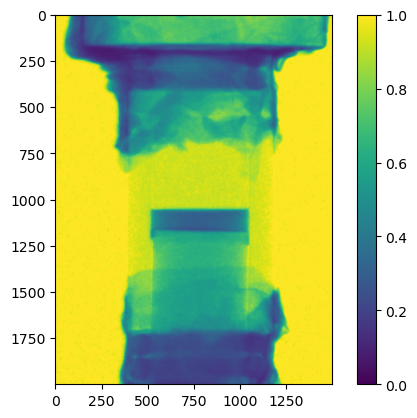

In [24]:
###################### need to change start
# crop_left = 4500
# crop_right = 6000
# crop_top = 800
# crop_bottom = 2800
crop_left = 500
crop_right = 2000
crop_top = 800
crop_bottom = 2800
###################### need to change end
crop = True
img = dxchange.read_tiff(os.path.join(data_dir, fname_list[img_idx]))
img_crop = rocku.crop(img, crop_left, crop_right, crop_top, crop_bottom, crop)
print("Cropped:")
plt.imshow(img_crop, vmin=0, vmax=1)
plt.colorbar()
plt.show()

In [25]:
# save_to = "/HFIR/CG1D/IPTS-"+ipts+"/shared/autoreduce/rockit/" + folder_name + "_left"
save_to = data_dir + "_left"
# save_to = data_dir + "_right"
for efname in fname_list:
    _img = dxchange.read_tiff(os.path.join(data_dir, efname))
    _img_crop = rocku.crop(_img, crop_left, crop_right, crop_top, crop_bottom, crop)
#     _img_crop = -1 * _img_crop
    _save_path = os.path.join(save_to, efname)
    print('Saving {} ...'.format(_save_path))
    dxchange.write_tiff(_img_crop, fname=_save_path, overwrite=True)

Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_discharge_0060_1534.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_discharge_0060_1539.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_discharge_0060_1544.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_discharge_0060_1549.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_discharge_0060_1554.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_discharge_0060_1559.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_

Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_discharge_0060_1824.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_discharge_0060_1829.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_discharge_0060_1834.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_discharge_0060_1839.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_discharge_0060_1844.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_discharge_0060_1849.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230907_cells_t_

Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_discharge_0060_2109.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_discharge_0060_2114.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_discharge_0060_2119.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_discharge_0060_2124.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_discharge_0060_2129.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_discharge_0060_2134.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_

Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_discharge_0060_2389.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_discharge_0060_2394.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_discharge_0060_2399.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_discharge_0060_2404.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_discharge_0060_2409.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_discharge_0060_2414.tiff ...
Saving /HFIR/CG1D/IPTS-28402/shared/processed_data/normalized/2023_09_07_insitu_60s_binned_by_5_left/20230908_cells_t_